In [86]:
## Name : Devansh Gupta
## Roll No : 102083052
## Batch : 4CO29

In [1]:
#Making necessary installs
!pip install pandas
!pip install numpy

In [35]:
# Import Section
import random
import math
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [36]:
df = pd.read_excel('DATASET.xlsx')#Reading provided dataset
df.rename(columns = {'Unnamed: 0':'Section_ID'}, inplace = True)#renaming section_ID column
df = df.drop([910, 911, 912, 913, 914, 915, 916, 917, 918])# Removing Sec_92 as there is an anomaly( data for 10th year is not present)
print(df)
for col in df.columns:#Checking for NaNs
  print("NaN in %s : %d" % (col, df[col].isnull().sum()))

     Section_ID  year  Para-1  Para-2  Para-3  Para-4  Para-5  Para-6  Para-7  \
0         Sec_1     1   324.0   354.5    17.0     0.0       3     117    2600   
1           NaN     2   324.0   161.1    18.2     0.0       4     106    5950   
2           NaN     3   324.0   170.7    18.5     0.0       4     110    5950   
3           NaN     4   324.0   223.9    18.9     0.0       3     110    6150   
4           NaN     5   324.0   228.2    18.4     0.0       2     113    6340   
...         ...   ...     ...     ...     ...     ...     ...     ...     ...   
1004        NaN     6   454.0   931.8    13.6   125.0      13     116    4150   
1005        NaN     7   454.0   703.0    14.5    17.0      13     118    4150   
1006        NaN     8   454.0  1124.1    14.9    45.0      18     117    4200   
1007        NaN     9   454.0  1462.3    13.2    62.0      27     117    4400   
1008        NaN    10   454.0   986.3    14.3    67.0      24     122    4415   

      Para-8  Para-9  Para-

D:\ANACONDA\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
D:\ANACONDA\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [37]:
multiply = 10
j = 0
for i in range(100):
  sec_name = df.iloc[j,0]
  df.iloc[j:j + multiply, 0] = sec_name
  j += multiply
test_frame = df.loc[df['year'] == 10]
df.head()

,Section_ID,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.52
1,Sec_1,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.62
2,Sec_1,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.68
3,Sec_1,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.78
4,Sec_1,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.80


In [38]:
rownum = 0
for row in range(100):
  df.iloc[rownum:rownum + 10, 0] = df.iloc[rownum, 0]#Writing section ID against each year
  rownum += 10
print(df)
for col in df.columns:
  print("NaN in %s : %d" % (col, df[col].isnull().sum()))
df.fillna(0, inplace=True)
print("After preprocessing:")
for col in df.columns:
  print("NaN in %s : %d" % (col, df[col].isnull().sum()))

     Section_ID  year  Para-1  Para-2  Para-3  Para-4  Para-5  Para-6  Para-7  \
0         Sec_1     1   324.0   354.5    17.0     0.0       3     117    2600   
1         Sec_1     2   324.0   161.1    18.2     0.0       4     106    5950   
2         Sec_1     3   324.0   170.7    18.5     0.0       4     110    5950   
3         Sec_1     4   324.0   223.9    18.9     0.0       3     110    6150   
4         Sec_1     5   324.0   228.2    18.4     0.0       2     113    6340   
...         ...   ...     ...     ...     ...     ...     ...     ...     ...   
1004    Sec_101     6   454.0   931.8    13.6   125.0      13     116    4150   
1005    Sec_101     7   454.0   703.0    14.5    17.0      13     118    4150   
1006    Sec_101     8   454.0  1124.1    14.9    45.0      18     117    4200   
1007    Sec_101     9   454.0  1462.3    13.2    62.0      27     117    4400   
1008    Sec_101    10   454.0   986.3    14.3    67.0      24     122    4415   

      Para-8  Para-9  Para-

In [76]:
from xgboost import XGBRegressor
model = XGBRegressor(random_state=90)

In [77]:
predictions = {'Para-9 predic': [], 'Para-10 predic': [], 'Para-11 predic': [], 'Para-12 predic': [], 'Para-13 predic': []}
predictions_headers = ['Para-9 predic', 'Para-10 predic', 'Para-11 predic', 'Para-12 predic', 'Para-13 predic']
rmse = []
combined_rmse=0
idx = 0
for col in [10, 11, 12, 13, 14]:
  res = 0
  for row in range(0, 1000, 10):
    xtrain = df.iloc[row:row+9, 1:10].values
    ytrain = df.iloc[row:row+9, col]
    xtest = df.iloc[row+9, 1:10].values
    ytest = df.iloc[row+9, col]
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest.reshape(1,-1))[0]
    predictions[predictions_headers[idx]].append(ypred)
    res += (ytest - ypred)**2
    combined_rmse+=res
  rmse.append((res/100)**0.5)
  idx += 1

In [78]:
df_prediction = pd.DataFrame.from_dict(predictions)
print(df_prediction)

    Para-9 predic  Para-10 predic  Para-11 predic  Para-12 predic  \
0    3.398811e+00    6.049885e+01    5.699891e+01        7.999336   
1    6.089891e+01    3.019855e+01    9.993413e-01        7.999299   
2    7.539892e+01    1.074621e-14    1.074621e-14       13.998545   
3    2.479873e+01    5.698064e+01    6.399891e+01        7.999380   
4    1.074621e-14    2.617977e+02    3.399949e+01        5.999571   
..            ...             ...             ...             ...   
95   1.893978e+02    1.916988e+02    9.998878e+00        7.998791   
96   5.198826e+00    7.109889e+01    2.399929e+01       11.999558   
97   1.221987e+02    6.769852e+01    1.499837e+01       11.998895   
98   1.407989e+02    2.927989e+02    1.669982e+02       11.999269   
99   1.381989e+02    3.049835e+01    5.998824e+00       17.998734   

    Para-13 predic  
0         1.918818  
1         0.792745  
2         1.412780  
3         1.887874  
4         1.768963  
..             ...  
95        1.554789  
96 

In [79]:
total_rmse_by_n = combined_rmse/500
final_comined_rmse = total_rmse_by_n**0.5
print("The combined RMSE is " + str(final_comined_rmse))



test_data = df.loc[df['year'] == 10]#Segregating test data
test_data

The combined RMSE is 201.98588729583432


,Section_ID,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
9,Sec_1,10,324.0,53.6,19.0,0.0,2,105,7567,1885,16.8,105.0,65.0,9,1.960
19,Sec_2,10,327.7,62.0,22.7,0.0,2,102,30525,10234,76.5,44.3,5.0,9,0.795
29,Sec_3,10,487.7,93.2,22.5,0.0,4,110,2140,1270,78.5,0.0,0.0,16,1.432
39,Sec_4,10,543.6,93.2,22.5,0.0,4,110,2140,1270,28.5,60.5,67.0,11,2.004
49,Sec_5,10,434.4,149.0,11.7,72.0,3,110,13142,6225,0.0,276.2,34.0,6,1.792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,Sec_97,10,514.0,1226.4,10.1,203.6,16,114,7672,303,219.7,206.2,10.0,8,1.607
978,Sec_98,10,901.0,1531.0,11.1,34.9,40,100,15150,1077,5.9,74.5,33.0,13,1.087
988,Sec_99,10,1181.0,1364.9,9.2,274.3,24,112,12500,880,131.4,72.4,18.0,12,0.996
998,Sec_100,10,662.0,1110.7,12.8,33.2,27,117,3324,1356,193.7,305.6,180.0,12,2.212


In [80]:
generator = []
for i in range(50):# pick 50 random rows to make plot
  generator.append(random.randint(0,90))
headers = ['Para-9', 'Para-10', 'Para-11', 'Para-12', 'Para-13']


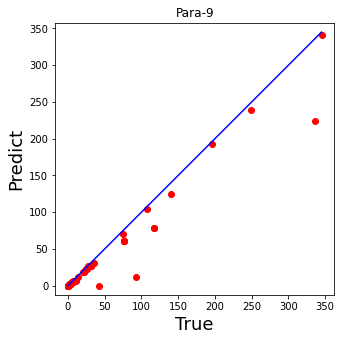

In [81]:
plt.figure(figsize=(5, 5))
predicted_value = df_prediction.iloc[generator, 0]
true_value = test_data.iloc[generator, 0 + 10]
plt.scatter(true_value, predicted_value, c='red')
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title(headers[0])
plt.xlabel('True', fontsize=18)
plt.ylabel('Predict', fontsize=18)
plt.axis('equal')
plt.show()

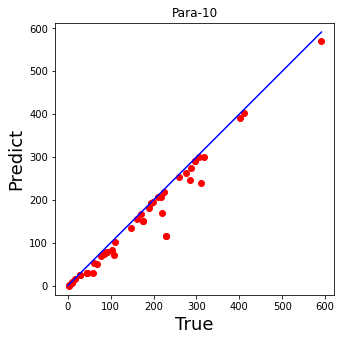

In [82]:

plt.figure(figsize=(5, 5))
predicted_value = df_prediction.iloc[generator, 1]
true_value = test_data.iloc[generator, 1 + 10]
plt.scatter(true_value, predicted_value, c='red')
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title(headers[1])
plt.xlabel('True', fontsize=18)
plt.ylabel('Predict', fontsize=18)
plt.axis('equal')
plt.show()

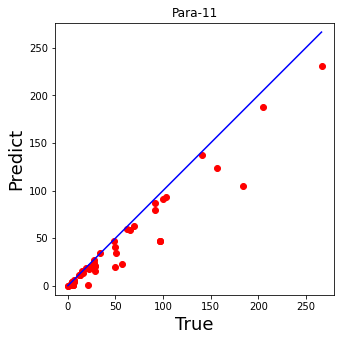

In [83]:

plt.figure(figsize=(5, 5))
predicted_value = df_prediction.iloc[generator, 2]
true_value = test_data.iloc[generator, 2 + 10]
plt.scatter(true_value, predicted_value, c='red')
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title(headers[2])
plt.xlabel('True', fontsize=18)
plt.ylabel('Predict', fontsize=18)
plt.axis('equal')
plt.show()

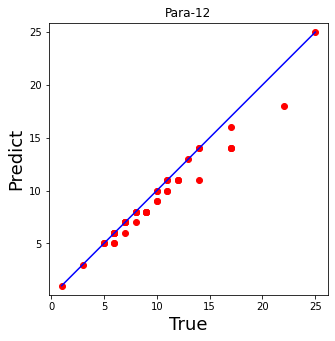

In [84]:

plt.figure(figsize=(5, 5))
predicted_value = df_prediction.iloc[generator, 3]
true_value = test_data.iloc[generator, 3 + 10]
plt.scatter(true_value, predicted_value, c='red')
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title(headers[3])
plt.xlabel('True', fontsize=18)
plt.ylabel('Predict', fontsize=18)
plt.axis('equal')
plt.show()

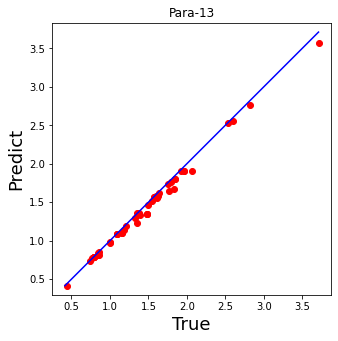

In [85]:

plt.figure(figsize=(5, 5))
predicted_value = df_prediction.iloc[generator, 4]
true_value = test_data.iloc[generator, 4 + 10]
plt.scatter(true_value, predicted_value, c='red')
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title(headers[4])
plt.xlabel('True', fontsize=18)
plt.ylabel('Predict', fontsize=18)
plt.axis('equal')
plt.show()